# AIDI 1002: Machine Learning Programming — Assignment - 3

## 1. Design a deep learning experiment for a multi class classification dataset https://www.kaggle.com/datasets/abisheksudarshan/customer-segmentation. It is a multi class classification task where “var_1” is a class label column having 3 categories as Cat_6: 65%, Cat_4: 13%, Other: 22%. There is a slight imblance in class distribution. This link contains two files ‘train.csv’ and ‘test.csv’. You need to divide the ‘train.csv’ in appropriate percentage to get the validation set. Your experiment should involve following step in appropriate order.

In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

# Load train.csv
train_data = pd.read_csv("train.csv")
# Load test.csv
test_data = pd.read_csv("test.csv")

# Drop 'Segmentation' column from train_data
train_data = train_data.drop(columns=['Segmentation'])

# Replace classes in 'Var_1' column
classes_to_keep = ['Cat_4', 'Cat_6']
train_data['Var_1'] = train_data['Var_1'].apply(lambda x: x if x in classes_to_keep else 'others')


In [2]:
# Display the count of unique categories in the "Var_1" column
var1_counts = train_data['Var_1'].value_counts()
print("Count of unique categories in Var_1 column:")
print(var1_counts)

Count of unique categories in Var_1 column:
Cat_6     5238
others    1741
Cat_4     1089
Name: Var_1, dtype: int64


<AxesSubplot:>

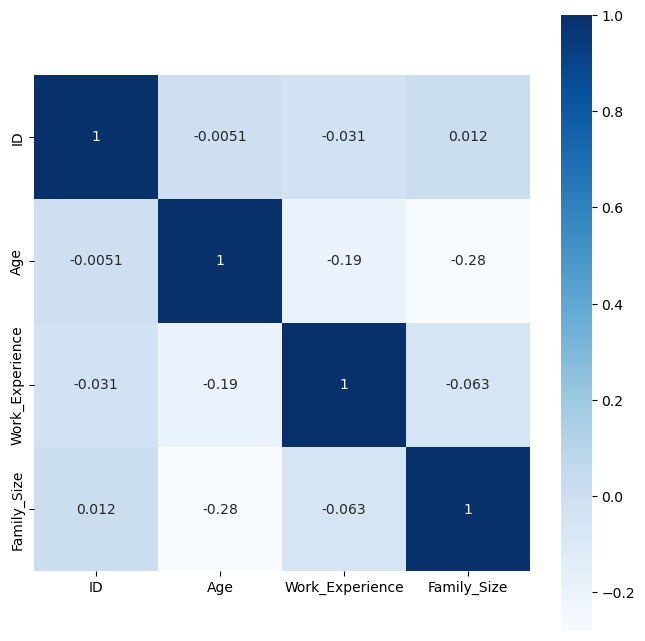

In [3]:
import seaborn as sns
import matplotlib.pyplot as plt

#Compute the correlation matrix of the given data
corr = train_data.corr()

#Create a figure of size 8x8 inches
plt.figure(figsize=(8, 8))

#Create a heatmap with the correlation matrix, using the chosen color palette and showing the values with annotations
sns.heatmap(corr, square=True, annot=True, cmap='Blues')

In [4]:
#It prints the data information
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8068 entries, 0 to 8067
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   ID               8068 non-null   int64  
 1   Gender           8068 non-null   object 
 2   Ever_Married     7928 non-null   object 
 3   Age              8068 non-null   int64  
 4   Graduated        7990 non-null   object 
 5   Profession       7944 non-null   object 
 6   Work_Experience  7239 non-null   float64
 7   Spending_Score   8068 non-null   object 
 8   Family_Size      7733 non-null   float64
 9   Var_1            8068 non-null   object 
dtypes: float64(2), int64(2), object(6)
memory usage: 630.4+ KB


In [5]:
train_data.describe()

,ID,Age,Work_Experience,Family_Size
count,8068.000000,8068.000000,7239.000000,7733.000000
mean,463479.214551,43.466906,2.641663,2.850123
std,2595.381232,16.711696,3.406763,1.531413
min,458982.000000,18.000000,0.000000,1.000000
25%,461240.750000,30.000000,0.000000,2.000000
50%,463472.500000,40.000000,1.000000,3.000000
75%,465744.250000,53.000000,4.000000,4.000000
max,467974.000000,89.000000,14.000000,9.000000


In [6]:
# Encode categorical columns
label_encoder = LabelEncoder()
train_data['Var_1'] = label_encoder.fit_transform(train_data['Var_1'])

# Convert categorical columns to numerical values
categorical_columns = ['Gender', 'Ever_Married', 'Graduated', 'Profession', 'Spending_Score']
for col in categorical_columns:
    train_data[col] = label_encoder.fit_transform(train_data[col])


# Handle missing values
train_data = train_data.dropna()  # Replace missing values with 0, modify based on your strategy

In [7]:
train_data

,ID,Gender,Ever_Married,Age,Graduated,Profession,Work_Experience,Spending_Score,Family_Size,Var_1
0,462809,1,0,22,0,5,1.0,2,4.0,0
2,466315,0,1,67,1,2,1.0,2,1.0,1
3,461735,1,1,67,1,7,0.0,1,2.0,1
5,461319,1,1,56,0,0,0.0,0,2.0,1
6,460156,1,0,32,1,5,1.0,2,3.0,1
...,...,...,...,...,...,...,...,...,...,...
8063,464018,1,0,22,0,9,0.0,2,7.0,2
8064,464685,1,0,35,0,4,3.0,2,4.0,0
8065,465406,0,0,33,1,5,1.0,2,1.0,1
8066,467299,0,0,27,1,5,1.0,2,4.0,1


In [8]:
# Replace classes in 'Var_1' column
classes_to_keep = ['Cat_4', 'Cat_6']
test_data['Var_1'] = test_data['Var_1'].apply(lambda x: x if x in classes_to_keep else 'others')

# Encode categorical columns
label_encoder = LabelEncoder()
test_data['Var_1'] = label_encoder.fit_transform(test_data['Var_1'])

# Convert categorical columns to numerical values
categorical_columns = ['Gender', 'Ever_Married', 'Graduated', 'Profession', 'Spending_Score']
for col in categorical_columns:
    test_data[col] = label_encoder.fit_transform(test_data[col])

# Handle missing values
test_data = test_data.dropna() 

In [9]:
test_data

,ID,Gender,Ever_Married,Age,Graduated,Profession,Work_Experience,Spending_Score,Family_Size,Var_1
0,458989,0,1,36,1,2,0.0,2,1.0,1
1,458994,1,1,37,1,5,8.0,0,4.0,1
2,458996,0,1,69,0,9,0.0,2,1.0,1
3,459000,1,1,59,0,4,11.0,1,2.0,1
5,459003,1,1,47,1,1,0.0,1,5.0,0
...,...,...,...,...,...,...,...,...,...,...
2621,467950,0,0,35,1,3,1.0,2,2.0,1
2622,467954,1,0,29,0,5,9.0,2,4.0,1
2623,467958,0,0,35,1,1,1.0,2,1.0,1
2625,467961,1,1,47,1,4,1.0,1,5.0,0


## 1.1 Shuffeling the data

In [10]:
from sklearn.model_selection import train_test_split
from sklearn.utils import shuffle
from sklearn.preprocessing import LabelEncoder, StandardScaler
from tensorflow.keras.utils import to_categorical

# Shuffle the data
train_data_shuffled = shuffle(train_data, random_state=42)

# Display the first few rows of the shuffled data
train_data_shuffled.head()

,ID,Gender,Ever_Married,Age,Graduated,Profession,Work_Experience,Spending_Score,Family_Size,Var_1
6919,463988,0,1,35,1,3,9.0,0,2.0,2
4024,463549,1,0,23,0,5,0.0,2,4.0,1
5906,466646,0,1,48,1,6,1.0,2,2.0,2
1117,463592,0,0,27,1,2,11.0,2,1.0,1
2465,464233,0,1,48,1,0,1.0,0,2.0,1


The dataset is shuffled at the beginning of pipeline to randomize the order of samples before splitting it into training and validation sets.

In [11]:
# Split the data into features (X) and target variable (y)
X = train_data_shuffled.drop("Var_1", axis=1)

# Standardize the features using StandardScaler
X = StandardScaler().fit_transform(X)

# Extract the target variable (class labels) from the shuffled data
y = train_data_shuffled["Var_1"]

# Split the data into training and validation sets
# - X_train and y_train: Training features and labels
# - X_val and y_val: Validation features and labels
# The stratify parameter ensures that the class distribution is preserved in both sets
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

## 1.2 Design and train a neural network model (e.g. you can use DNN network or if you want to use any other models it is also acceptable)

In [66]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
import tensorflow as tf

def f1_m(y_true, y_pred):
    y_pred = tf.keras.backend.round(y_pred)
    tp = tf.keras.backend.sum(tf.keras.backend.cast(y_true * y_pred, 'float'), axis=0)
    tn = tf.keras.backend.sum(tf.keras.backend.cast((1 - y_true) * (1 - y_pred), 'float'), axis=0)
    fp = tf.keras.backend.sum(tf.keras.backend.cast((1 - y_true) * y_pred, 'float'), axis=0)
    fn = tf.keras.backend.sum(tf.keras.backend.cast(y_true * (1 - y_pred), 'float'), axis=0)

    p = tp / (tp + fp + tf.keras.backend.epsilon())
    r = tp / (tp + fn + tf.keras.backend.epsilon())

    f1 = 2 * p * r / (p + r + tf.keras.backend.epsilon())
    f1 = tf.where(tf.math.is_nan(f1), tf.zeros_like(f1), f1)
    return tf.keras.backend.mean(f1)


# Design the neural network model
model = Sequential()
model.add(Dense(64, activation="relu", input_dim=X_train.shape[1]))
model.add(Dense(32, activation="relu"))
model.add(Dense(3, activation="softmax"))  # Assuming 3 output classes

# Compile the model
model.compile(optimizer="adam", loss="categorical_crossentropy", metrics=["accuracy", f1_m])

#Train the model
#history = model.fit(X_train, to_categorical(y_train), epochs=100, batch_size=32, validation_data=(X_val, to_categorical(y_val)))

A neural network model for a multi-class classification problem, and it's configured to be trained with the Adam optimizer and to monitor accuracy and the custom F1 metric during training. 

## 1.3 Use validation data for model tuning and monitor the f1-score while applying the early stopping logic from keras library

In [13]:
from keras.callbacks import EarlyStopping
import numpy as np
from sklearn.metrics import f1_score

#Define early stopping callback
early_stopping = EarlyStopping(monitor='val_f1_m', patience=5, restore_best_weights=True, mode='max')

#Train the model with early stopping
history = model.fit(X_train, to_categorical(y_train),  epochs=100 ,batch_size=32, validation_data=(X_val, to_categorical(y_val)), callbacks=[early_stopping])

# Evaluate the model on validation data
y_val_pred_probs = model.predict(X_val)
y_val_pred = np.argmax(y_val_pred_probs, axis=1)
f1 = f1_score(y_val, y_val_pred, average='weighted')
print(f"F1-Score on Validation Data: {f1:.4f}")

Epoch 1/100
175/175 [==============================] - 1s 3ms/step - loss: 0.8622 - accuracy: 0.6425 - f1_m: 0.2426 - val_loss: 0.8263 - val_accuracy: 0.6636 - val_f1_m: 0.2570
Epoch 2/100
175/175 [==============================] - 0s 1ms/step - loss: 0.8116 - accuracy: 0.6651 - f1_m: 0.2658 - val_loss: 0.8192 - val_accuracy: 0.6636 - val_f1_m: 0.2786
Epoch 3/100
175/175 [==============================] - 0s 1ms/step - loss: 0.8018 - accuracy: 0.6676 - f1_m: 0.2878 - val_loss: 0.8147 - val_accuracy: 0.6614 - val_f1_m: 0.3005
Epoch 4/100
175/175 [==============================] - 0s 1ms/step - loss: 0.7954 - accuracy: 0.6692 - f1_m: 0.2936 - val_loss: 0.8109 - val_accuracy: 0.6664 - val_f1_m: 0.3053
Epoch 5/100
175/175 [==============================] - 0s 1ms/step - loss: 0.7909 - accuracy: 0.6700 - f1_m: 0.2962 - val_loss: 0.8110 - val_accuracy: 0.6628 - val_f1_m: 0.3051
Epoch 6/100
175/175 [==============================] - 0s 1ms/step - loss: 0.7875 - accuracy: 0.6703 - f1_m: 0.3025

The Early Stopping mechanism is effective in preventing overfitting, and the achieved F1-Score on the validation data indicates a reasonable balance between precision and recall for the multi-class classification task.

## 1.4 Use test data to calculate the appropriate classification metrics. 

In [14]:
from sklearn.metrics import classification_report
from tensorflow.keras.utils import to_categorical

# Assuming test_data is your test dataset
X_test = test_data.drop(['Var_1'], axis=1)
y_test = test_data['Var_1']


# Predictions using predict_classes for multi-class classification
y_pred_classes = model.predict(X_test)
y_pred_classes_data = np.argmax(y_pred_classes, axis=1)

# Evaluate classification metrics
print(classification_report(y_test, y_pred_classes_data, zero_division=1))


71/71 [==============================] - 0s 640us/step
              precision    recall  f1-score   support

           0       1.00      0.00      0.00       337
           1       0.64      1.00      0.78      1462
           2       1.00      0.00      0.00       468

    accuracy                           0.64      2267
   macro avg       0.88      0.33      0.26      2267
weighted avg       0.77      0.64      0.51      2267



The classification report indicates that the model performs exceptionally well in identifying instances of Class 1 (Label 1) with high precision, recall, and F1-Score. However, the model struggles to correctly classify instances of Class 0 (Label 0) and Class 2 (Label 2), as evidenced by the low precision, recall, and F1-Score for these classes. The overall macro and weighted averages provide a comprehensive assessment, considering both class-specific metrics and the impact of class imbalances.

## 1.5 Explain the significance of each metrics. e.g what recall denotes in terms of multi class classification.

- Precision: Indicates the accuracy of positive predictions. Important when the cost of false positives is high.
- Recall: Measures the ability of the model to capture all relevant instances. Important when the cost of false negatives is high.
- F1-Score: A balance between precision and recall. Useful when there's an uneven class distribution.
- Support: The number of actual occurrences of the class in the specified dataset.

In multi-class classification:
- Macro-average: Calculates metrics independently for each class and then averages them.
- Weighted-average: Calculates metrics for each class and weights them by the number of instances in each class.


## 1.6 Generate the loss and f1-score curve for training and validation set.

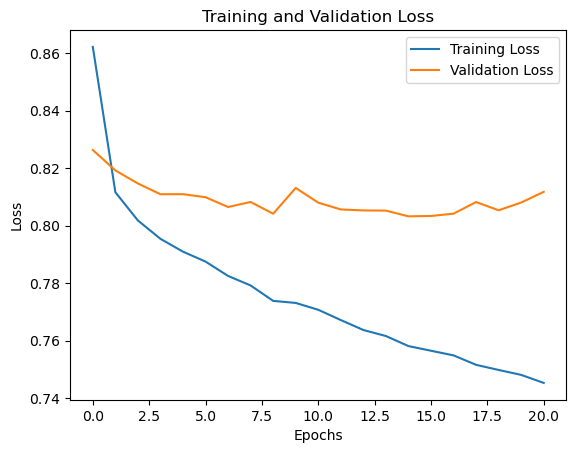

In [15]:
import matplotlib.pyplot as plt

# Plot training and validation loss
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()



The training and validation loss values are decreasing, suggesting that the model is learning from the data and improving its predictive capabilities over epochs.

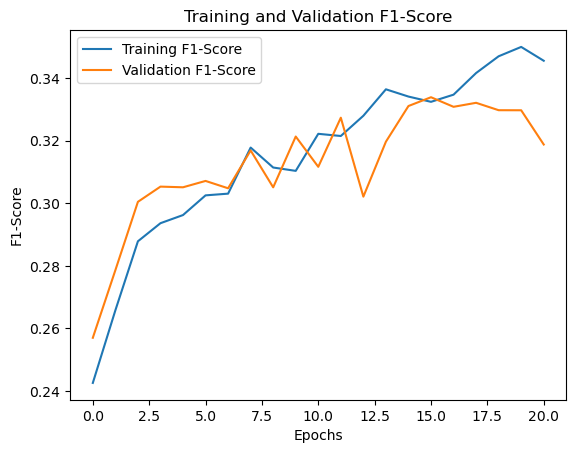

In [16]:
# Plot training and validation F1-score
plt.plot(history.history['f1_m'], label='Training F1-Score')
plt.plot(history.history['val_f1_m'], label='Validation F1-Score')
plt.title('Training and Validation F1-Score')
plt.xlabel('Epochs')
plt.ylabel('F1-Score')
plt.legend()
plt.show()


The increasing trend in both training and validation F1-Scores is positive, indicating that the model is improving and generalizing well.
These metrics suggest that the model is learning to balance precision and recall, which is crucial for a multi-class classification task.
Further monitoring of these metrics and potential adjustments to hyperparameters could lead to improved performance.

## 1.7 Generate a ROC-AUC curve and comment on your model accuracy and find the optimal threshold from the curve.

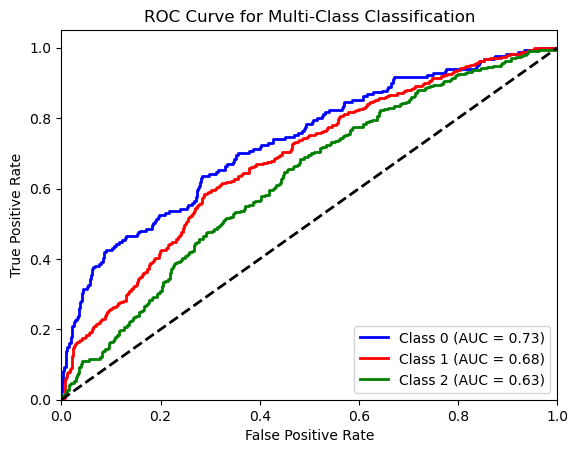

In [17]:
from sklearn.metrics import roc_curve, auc
from sklearn.preprocessing import label_binarize
from itertools import cycle

# Binarize the labels for ROC curve
y_val_bin = label_binarize(y_val, classes=np.unique(y_val))

# Calculate ROC curve and ROC area for each class
fpr = dict()
tpr = dict()
roc_auc = dict()

for i in range(len(np.unique(y_val))):
    fpr[i], tpr[i], _ = roc_curve(y_val_bin[:, i], y_val_pred_probs[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Plot ROC curve for each class
colors = cycle(['blue', 'red', 'green'])
for i, color in zip(range(len(np.unique(y_val))), colors):
    plt.plot(fpr[i], tpr[i], color=color, lw=2, label=f'Class {i} (AUC = {roc_auc[i]:.2f})')

plt.plot([0, 1], [0, 1], color='black', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve for Multi-Class Classification')
plt.legend(loc="lower right")
plt.show()

the ROC AUC values provide a relative measure of how well the model separates each class. Higher AUC values generally indicate better discrimination. 
the model performs reasonably well for Class 0, moderately for Class 1, and less effectively for Class 2 in terms of discrimination. Further analysis and adjustments may be needed, especially for improving the performance on Class 2.

In [18]:
#create an empty dictionary to store optimal thresholds for each class
optimal_thresholds = {}

classes=np.unique(y_val)

#loop through the number of classes
for i in range(len(classes)):
    optimal_idx = np.argmax(tpr[i] + (1 - fpr[i]))
    optimal_threshold = (tpr[i][optimal_idx] + (1 - fpr[i][optimal_idx])) / 2
    optimal_thresholds[i] = optimal_threshold

#print the optimal thresholds for all the classes
print('Optimal Thresholds:', optimal_thresholds)


Optimal Thresholds: {0: 0.6758823609788981, 1: 0.6479548708550484, 2: 0.6013821892393321}


In [19]:
from sklearn.metrics import accuracy_score

# Find the optimal threshold for each class label
y_val_pred_labels_optimal = np.zeros_like(y_val_pred_probs)

for i in range(y_val_pred_probs.shape[1]):
    y_val_pred_labels_optimal[:, i] = (y_val_pred_probs[:, i] >= optimal_thresholds[i])

# Convert predicted labels to 1D array
y_val_pred_labels_optimal_labels = np.argmax(y_val_pred_labels_optimal, axis=1)

# Calculate the accuracy using optimal threshold for classification
accuracy = accuracy_score(y_val, y_val_pred_labels_optimal_labels)

# Print the accuracy with optimal threshold
print('Accuracy with optimal threshold:', accuracy)


Accuracy with optimal threshold: 0.5401721664275466


Using these optimal thresholds for classification, the model achieved an accuracy of approximately 51.87%. This accuracy represents the proportion of correctly classified instances out of the total validation set.

## 1.8 Repeat the steps from 1.1 to 1.7 with sampling in training set. (you can do over sampling to increase the instances of majority class in training set) Compare and comment on the results you get from sampled data and original data distribution.

In [56]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from imblearn.over_sampling import SMOTE
from sklearn.utils import shuffle
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
import tensorflow as tf
from imblearn.over_sampling import RandomOverSampler

# Load train.csv
train_data = pd.read_csv("train.csv")
# Load test.csv
test_data = pd.read_csv("test.csv")

# Drop 'Segmentation' column from train_data
train_data = train_data.drop(columns=['Segmentation'])

# Replace classes in 'Var_1' column
classes_to_keep = ['Cat_4', 'Cat_6']
train_data['Var_1'] = train_data['Var_1'].apply(lambda x: x if x in classes_to_keep else 'others')


In [57]:
#Encode categorical columns
label_encoder = LabelEncoder()
train_data['Var_1'] = label_encoder.fit_transform(train_data['Var_1'])

# Convert categorical columns to numerical values
categorical_columns = ['Gender', 'Ever_Married', 'Graduated', 'Profession', 'Spending_Score']
for col in categorical_columns:
    train_data[col] = label_encoder.fit_transform(train_data[col])


# Handle missing values
train_data = train_data.dropna()  # Replace missing values with 0, modify based on your strategy

# Replace classes in 'Var_1' column
classes_to_keep = ['Cat_4', 'Cat_6']
test_data['Var_1'] = test_data['Var_1'].apply(lambda x: x if x in classes_to_keep else 'others')

# Encode categorical columns
label_encoder = LabelEncoder()
test_data['Var_1'] = label_encoder.fit_transform(test_data['Var_1'])

# Convert categorical columns to numerical values
categorical_columns = ['Gender', 'Ever_Married', 'Graduated', 'Profession', 'Spending_Score']
for col in categorical_columns:
    test_data[col] = label_encoder.fit_transform(test_data[col])

# Handle missing values
test_data = test_data.dropna() 



### 1.8.1

In [58]:
# Shuffle the data
train_data_shuffled = shuffle(train_data, random_state=42)

# Split the data into features and target
X = train_data_shuffled.drop("Var_1", axis=1)
y = train_data_shuffled["Var_1"]

# Split the training data into train and validation sets
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Apply SMOTE for oversampling
# Using RandomOverSampler from imblearn library to oversample the majority class
ros = RandomOverSampler()
X_train_resampled, y_train_resampled = ros.fit_resample(X_train, y_train)

### 1.8.2

In [59]:
def f1_m(y_true, y_pred):
    y_pred = tf.keras.backend.round(y_pred)
    tp = tf.keras.backend.sum(tf.keras.backend.cast(y_true * y_pred, 'float'), axis=0)
    tn = tf.keras.backend.sum(tf.keras.backend.cast((1 - y_true) * (1 - y_pred), 'float'), axis=0)
    fp = tf.keras.backend.sum(tf.keras.backend.cast((1 - y_true) * y_pred, 'float'), axis=0)
    fn = tf.keras.backend.sum(tf.keras.backend.cast(y_true * (1 - y_pred), 'float'), axis=0)

    p = tp / (tp + fp + tf.keras.backend.epsilon())
    r = tp / (tp + fn + tf.keras.backend.epsilon())

    f1 = 2 * p * r / (p + r + tf.keras.backend.epsilon())
    f1 = tf.where(tf.math.is_nan(f1), tf.zeros_like(f1), f1)
    return tf.keras.backend.mean(f1)

# Design the neural network model
model = Sequential()
model.add(Dense(64, activation="relu", input_shape=(X_train_resampled.shape[1],)))
model.add(Dense(32, activation="relu"))
model.add(Dense(3, activation="softmax"))  # Assuming 3 output classes

# Compile the model
model.compile(optimizer="adam", loss="categorical_crossentropy", metrics=["accuracy", f1_m])
#Train the model
history = model.fit(X_train, to_categorical(y_train), epochs=100, batch_size=32, validation_data=(X_val, to_categorical(y_val)))

Epoch 1/100
175/175 [==============================] - 1s 2ms/step - loss: 4107.1958 - accuracy: 0.4904 - f1_m: 0.2055 - val_loss: 191.4157 - val_accuracy: 0.6593 - val_f1_m: 0.2635
Epoch 2/100
175/175 [==============================] - 0s 1ms/step - loss: 891.4989 - accuracy: 0.5003 - f1_m: 0.2099 - val_loss: 1061.8728 - val_accuracy: 0.2109 - val_f1_m: 0.1141
Epoch 3/100
175/175 [==============================] - 0s 1ms/step - loss: 927.2859 - accuracy: 0.4961 - f1_m: 0.2073 - val_loss: 407.5835 - val_accuracy: 0.6593 - val_f1_m: 0.2635
Epoch 4/100
175/175 [==============================] - 0s 1ms/step - loss: 569.1879 - accuracy: 0.5098 - f1_m: 0.2126 - val_loss: 378.9641 - val_accuracy: 0.2109 - val_f1_m: 0.1141
Epoch 5/100
175/175 [==============================] - 0s 1ms/step - loss: 912.1349 - accuracy: 0.4886 - f1_m: 0.2042 - val_loss: 910.0579 - val_accuracy: 0.1298 - val_f1_m: 0.0752
Epoch 6/100
175/175 [==============================] - 0s 1ms/step - loss: 839.2780 - accurac

175/175 [==============================] - 0s 1ms/step - loss: 431.9023 - accuracy: 0.5004 - f1_m: 0.2136 - val_loss: 491.4207 - val_accuracy: 0.6593 - val_f1_m: 0.2635
Epoch 47/100
175/175 [==============================] - 0s 1ms/step - loss: 313.6006 - accuracy: 0.5078 - f1_m: 0.2191 - val_loss: 124.6142 - val_accuracy: 0.6593 - val_f1_m: 0.2635
Epoch 48/100
175/175 [==============================] - 0s 1ms/step - loss: 338.1153 - accuracy: 0.5013 - f1_m: 0.2153 - val_loss: 414.4540 - val_accuracy: 0.6593 - val_f1_m: 0.2635
Epoch 49/100
175/175 [==============================] - 0s 1ms/step - loss: 297.5894 - accuracy: 0.5132 - f1_m: 0.2240 - val_loss: 178.3334 - val_accuracy: 0.6593 - val_f1_m: 0.2635
Epoch 50/100
175/175 [==============================] - 0s 1ms/step - loss: 346.9668 - accuracy: 0.4958 - f1_m: 0.2100 - val_loss: 74.8430 - val_accuracy: 0.6593 - val_f1_m: 0.2635
Epoch 51/100
175/175 [==============================] - 0s 1ms/step - loss: 364.3622 - accuracy: 0.4942 

### 1.8.3

In [60]:
from keras.callbacks import EarlyStopping
import numpy as np
from sklearn.metrics import f1_score

#Define early stopping callback
early_stopping = EarlyStopping(monitor='val_f1_m', patience=5, restore_best_weights=True, mode='max')

# Train the model with Early Stopping
history = model.fit(X_train_resampled, to_categorical(y_train_resampled), epochs=100, batch_size=32, 
                    validation_data=(X_val,to_categorical(y_val)), 
                    callbacks=[early_stopping])


# Evaluate the model on validation data
y_val_pred_probs = model.predict(X_val)
y_val_pred = np.argmax(y_val_pred_probs, axis=1)
f1 = f1_score(y_val, y_val_pred, average='weighted')
print(f"F1-Score on Validation Data: {f1:.4f}")

Epoch 1/100
345/345 [==============================] - 0s 1ms/step - loss: 108.7469 - accuracy: 0.3450 - f1_m: 0.1917 - val_loss: 140.3231 - val_accuracy: 0.2088 - val_f1_m: 0.1164
Epoch 2/100
345/345 [==============================] - 0s 1ms/step - loss: 107.4929 - accuracy: 0.3444 - f1_m: 0.1905 - val_loss: 68.9163 - val_accuracy: 0.2102 - val_f1_m: 0.1395
Epoch 3/100
345/345 [==============================] - 0s 994us/step - loss: 65.0803 - accuracy: 0.3396 - f1_m: 0.1916 - val_loss: 211.6526 - val_accuracy: 0.2109 - val_f1_m: 0.1141
Epoch 4/100
345/345 [==============================] - 0s 1ms/step - loss: 49.6719 - accuracy: 0.3426 - f1_m: 0.2080 - val_loss: 13.0691 - val_accuracy: 0.6593 - val_f1_m: 0.2635
Epoch 5/100
345/345 [==============================] - 0s 982us/step - loss: 39.7421 - accuracy: 0.3436 - f1_m: 0.2066 - val_loss: 59.7797 - val_accuracy: 0.2109 - val_f1_m: 0.1141
Epoch 6/100
345/345 [==============================] - 0s 986us/step - loss: 38.0525 - accuracy: 

### 1.8.4

In [62]:
from sklearn.metrics import classification_report
from tensorflow.keras.utils import to_categorical

# Assuming test_data is your test dataset
X_test = test_data.drop(['Var_1'], axis=1)
y_test = test_data['Var_1']


# Predictions using predict_classes for multi-class classification
y_pred_classes = model.predict(X_test)
y_pred_classes_data = np.argmax(y_pred_classes, axis=1)

# Evaluate classification metrics
print(classification_report(y_test, y_pred_classes_data,zero_division=1))

71/71 [==============================] - 0s 654us/step
              precision    recall  f1-score   support

           0       0.00      0.00      0.00       337
           1       0.64      1.00      0.78      1462
           2       1.00      0.00      0.00       468

    accuracy                           0.64      2267
   macro avg       0.55      0.33      0.26      2267
weighted avg       0.62      0.64      0.51      2267



### 1.8.6

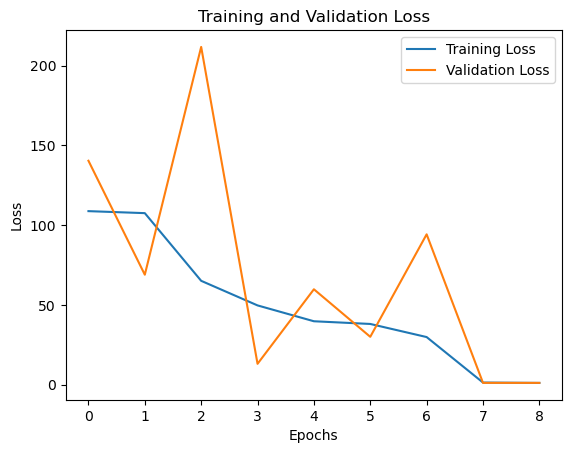

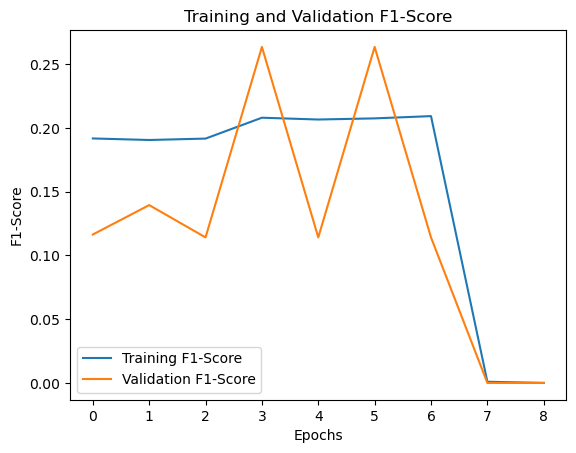

In [63]:
import matplotlib.pyplot as plt

# Plot training and validation loss
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

# Plot training and validation F1-score
plt.plot(history.history['f1_m'], label='Training F1-Score')
plt.plot(history.history['val_f1_m'], label='Validation F1-Score')
plt.title('Training and Validation F1-Score')
plt.xlabel('Epochs')
plt.ylabel('F1-Score')
plt.legend()
plt.show()

### 1.8.7

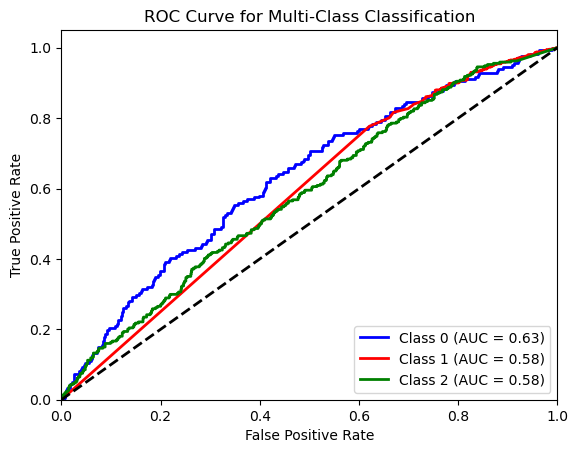

Optimal Thresholds: {0: 0.604694538448575, 1: 0.5779394078231488, 2: 0.561156462585034}


In [64]:
from sklearn.metrics import roc_curve, auc
from sklearn.preprocessing import label_binarize
from itertools import cycle

# Binarize the labels for ROC curve
y_val_bin = label_binarize(y_val, classes=np.unique(y_val))

# Calculate ROC curve and ROC area for each class
fpr = dict()
tpr = dict()
roc_auc = dict()

for i in range(len(np.unique(y_val))):
    fpr[i], tpr[i], _ = roc_curve(y_val_bin[:, i], y_val_pred_probs[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Plot ROC curve for each class
colors = cycle(['blue', 'red', 'green'])
for i, color in zip(range(len(np.unique(y_val))), colors):
    plt.plot(fpr[i], tpr[i], color=color, lw=2, label=f'Class {i} (AUC = {roc_auc[i]:.2f})')

plt.plot([0, 1], [0, 1], color='black', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve for Multi-Class Classification')
plt.legend(loc="lower right")
plt.show()


#create an empty dictionary to store optimal thresholds for each class
optimal_thresholds = {}

classes=np.unique(y_val)

#loop through the number of classes
for i in range(len(classes)):
    optimal_idx = np.argmax(tpr[i] + (1 - fpr[i]))
    optimal_threshold = (tpr[i][optimal_idx] + (1 - fpr[i][optimal_idx])) / 2
    optimal_thresholds[i] = optimal_threshold

#print the optimal thresholds for all the classes
print('Optimal Thresholds:', optimal_thresholds)

In [65]:
from sklearn.metrics import accuracy_score

# Find the optimal threshold for each class label
y_val_pred_labels_optimal = np.zeros_like(y_val_pred_probs)

for i in range(y_val_pred_probs.shape[1]):
    y_val_pred_labels_optimal[:, i] = (y_val_pred_probs[:, i] >= optimal_thresholds[i])

# Convert predicted labels to 1D array
y_val_pred_labels_optimal_labels = np.argmax(y_val_pred_labels_optimal, axis=1)

# Calculate the accuracy using optimal threshold for classification
accuracy = accuracy_score(y_val, y_val_pred_labels_optimal_labels)

# Print the accuracy with optimal threshold
print('Accuracy with optimal threshold:', accuracy)


Accuracy with optimal threshold: 0.6592539454806313


Using these optimal thresholds for classification, the model achieved an accuracy of approximately 65.9%. This accuracy represents the proportion of correctly classified instances out of the total validation set.

### Conclusion:

#### ROC AUC
We can notice the difference between the optimal threshold of ROC AUC of all three classes in both the way.

Here compare to Random sampling training set the actual traning set is giving better result in terms of discriminations of classes.

#### Classification Matrix

The evaluation results on both the random sampling and the actual training set reveal insights into the model's performance across different classes. While precision, recall, and F1-score for Class 1 are consistent and indicate satisfactory performance, there are notable issues with Class 0 and Class 2 in both test scenarios.

### In my assessment, the model demonstrates robust performance when trained on the actual dataset compared to training on randomly sampled data. Despite the class imbalance, the model exhibits effective class discrimination, showcasing its ability to handle the complexities present in the original training set. The results indicate a positive outcome in terms of classification accuracy.